<a href="https://colab.research.google.com/github/Mani0322/Deep-learning/blob/main/yoga_pose_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
import os
os.environ["KAGGLE_CONFIG_DIR"]="/content/gdrive/MyDrive"

In [5]:
!kaggle datasets download -d niharika41298/yoga-poses-dataset

 99% 285M/288M [00:02<00:00, 119MB/s]
100% 288M/288M [00:02<00:00, 128MB/s]


In [6]:
!unzip \*.zip

Archive:  yoga-poses-dataset.zip
  inflating: DATASET/TEST/downdog/00000000.jpg  
  inflating: DATASET/TEST/downdog/00000001.JPG  
  inflating: DATASET/TEST/downdog/00000002.jpg  
  inflating: DATASET/TEST/downdog/00000003.jpg  
  inflating: DATASET/TEST/downdog/00000004.jpg  
  inflating: DATASET/TEST/downdog/00000005.jpg  
  inflating: DATASET/TEST/downdog/00000006.jpg  
  inflating: DATASET/TEST/downdog/00000007.jpg  
  inflating: DATASET/TEST/downdog/00000008.jpg  
  inflating: DATASET/TEST/downdog/00000009.jpg  
  inflating: DATASET/TEST/downdog/00000010.png  
  inflating: DATASET/TEST/downdog/00000011.jpg  
  inflating: DATASET/TEST/downdog/00000012.jpg  
  inflating: DATASET/TEST/downdog/00000013.jpg  
  inflating: DATASET/TEST/downdog/00000014.jpg  
  inflating: DATASET/TEST/downdog/00000016.jpg  
  inflating: DATASET/TEST/downdog/00000017.png  
  inflating: DATASET/TEST/downdog/00000018.jpg  
  inflating: DATASET/TEST/downdog/00000019.jpg  
  inflating: DATASET/TEST/downdog/00

In [7]:
train_path = "/content/DATASET/TRAIN"
test_path = "/content/DATASET/TEST"


In [60]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input,Flatten,Dense
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
import glob
import matplotlib.pyplot as plt






In [61]:
img_size = [224,224]


In [62]:
vgg = VGG16(input_shape=img_size + [3],weights="imagenet",include_top=False)

In [63]:
for layer in vgg.layers:
  layer.trainable = False

In [77]:
nb_classes = 5

In [78]:
x = Flatten()(vgg.output)

In [79]:
prediction = Dense(nb_classes,activation="softmax")(x)

In [81]:
model = Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [85]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [91]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


In [92]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  rescale=1./255)

In [93]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="categorical")

Found 1081 images belonging to 5 classes.


In [94]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="categorical")

Found 470 images belonging to 5 classes.


In [96]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [98]:
import warnings
warnings.filterwarnings("ignore")

In [100]:
r = model.fit_generator(train_set,validation_data=test_set,epochs=10,steps_per_epoch=len(train_set),validation_steps=len(test_set))

Epoch 1/10
34/34 [==============================] - 44s 1s/step - loss: 0.2262 - accuracy: 0.9482 - val_loss: 0.1602 - val_accuracy: 0.9574
Epoch 2/10
34/34 [==============================] - 43s 1s/step - loss: 0.2236 - accuracy: 0.9519 - val_loss: 0.1403 - val_accuracy: 0.9638
Epoch 3/10
34/34 [==============================] - 43s 1s/step - loss: 0.1913 - accuracy: 0.9648 - val_loss: 0.1630 - val_accuracy: 0.9574
Epoch 4/10
34/34 [==============================] - 44s 1s/step - loss: 0.1747 - accuracy: 0.9621 - val_loss: 0.1323 - val_accuracy: 0.9617
Epoch 5/10
34/34 [==============================] - 44s 1s/step - loss: 0.1711 - accuracy: 0.9741 - val_loss: 0.1302 - val_accuracy: 0.9596
Epoch 6/10
34/34 [==============================] - 44s 1s/step - loss: 0.1529 - accuracy: 0.9787 - val_loss: 0.1486 - val_accuracy: 0.9511
Epoch 7/10
34/34 [==============================] - 44s 1s/step - loss: 0.1544 - accuracy: 0.9722 - val_loss: 0.1563 - val_accuracy: 0.9532
Epoch 8/10
34/34 [==

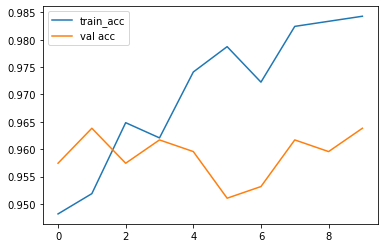

In [102]:
plt.plot(r.history["accuracy"],label="train_acc")
plt.plot(r.history["val_accuracy"],label="val acc")
plt.legend()
plt.show()

In [103]:
model.evaluate(test_set)

15/15 [==============================] - 16s 1s/step - loss: 0.1133 - accuracy: 0.9638


[0.11328768730163574, 0.9638298153877258]

In [105]:
model.save("yoga_pose.h5")

In [120]:
import cv2
import numpy as np
from tqdm import tqdm



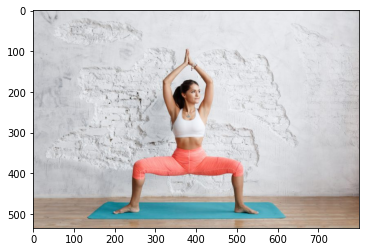

In [148]:
# upload new image for testing our model
img2 = cv2.imread("/content/drive/MyDrive/img1.jpg")
img3 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img3)
plt.show()

In [144]:
img = cv2.resize(cv2.imread('/content/drive/MyDrive/img1.jpg'),(224,224))
img = np.expand_dims(img,axis=0)


In [145]:
pred = model.predict(img)
pred

array([[0., 1., 0., 0., 0.]], dtype=float32)

In [149]:

class_names = ["downdog","goddess","plank","tree","warrior2"]

In [ ]:
# our model predict the image is goddess yoga pose perfectly